Data from [NCBI Bioproject](https://www.ncbi.nlm.nih.gov/Traces/study/?query_key=10&WebEnv=MCID_65633c9dda4f626312e4bd9e&o=acc_s%3Aa) from the paper [Aberrant B cell repertoire selection associated with HIV neutralizing antibody breadth](https://www.nature.com/articles/s41590-019-0581-0)

From the paper:  
we analyze antibody heavy-chain (IGH) gene repertoires in 96 patients with chronic HIV infection  
- (46 patients with extensive neutralizing breath (bNAb) 
- and 50 patients without neutralizing breadth (noNAb)) 
- and 43 HIV-uninfected controls from the same geographical regions


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!mkdir img
out_path ='img/'

mkdir: cannot create directory ‘img’: File exists


In [19]:
#metadata from https://www.ncbi.nlm.nih.gov/Traces/study/?query_key=10&WebEnv=MCID_65633c9dda4f626312e4bd9e&o=acc_s%3Aa
df = pd.read_csv('PRJNA486667_SraRunTable.txt')
df

,Run,Age,aliquot,Assay Type,AvgSpotLen,Bases,BIOMATERIAL_PROVIDER,BioProject,BioSample,BioSampleModel,...,ReleaseDate,create_date,version,Sample Name,sample_type,sequencing_run (run),sex,SRA Study,subject,tissue
0,SRR7717525,22,1,AMPLICON,332,12393194,not applicable,PRJNA486667,SAMN09861793,Human,...,2019-09-16T00:00:00Z,2018-08-19T16:04:00Z,1,M132-S067,gDNA,M132,male,SRP158331,705010614,PBMC
1,SRR7717529,19,1,AMPLICON,332,12079051,not applicable,PRJNA486667,SAMN09861775,Human,...,2019-09-16T00:00:00Z,2018-08-19T16:04:00Z,1,M132-S057,gDNA,M132,female,SRP158331,704010453,PBMC
2,SRR7717547,21,1,AMPLICON,331,10937064,not applicable,PRJNA486667,SAMN09861691,Human,...,2019-09-16T00:00:00Z,2018-08-19T16:04:00Z,1,M132-S004,gDNA,M132,female,SRP158331,704010146,PBMC
3,SRR7717548,32,1,AMPLICON,333,13604636,not applicable,PRJNA486667,SAMN09861695,Human,...,2019-09-16T00:00:00Z,2018-08-19T16:04:00Z,1,M132-S006,gDNA,M132,male,SRP158331,700010189,PBMC
4,SRR7717549,41,1,AMPLICON,328,10515302,not applicable,PRJNA486667,SAMN09861783,Human,...,2019-09-16T00:00:00Z,2018-08-19T16:04:00Z,1,M132-S061,gDNA,M132,female,SRP158331,706010413,PBMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,SRR7718887,28,1,AMPLICON,334,10358585,not applicable,PRJNA486667,SAMN09861653,Human,...,2019-09-16T00:00:00Z,2018-08-19T18:24:00Z,1,M114-S021,gDNA,M114,male,SRP158331,704010486,PBMC
419,SRR7718905,26,1,AMPLICON,329,10025323,not applicable,PRJNA486667,SAMN09861681,Human,...,2019-09-16T00:00:00Z,2018-08-19T18:24:00Z,1,M114-S049,gDNA,M114,female,SRP158331,705010801,PBMC
420,SRR7718907,30,1,AMPLICON,330,11694135,not applicable,PRJNA486667,SAMN09861641,Human,...,2019-09-16T00:00:00Z,2018-08-19T18:24:00Z,1,M114-S053,gDNA,M114,male,SRP158331,703010314,PBMC
421,SRR7718908,21,1,AMPLICON,332,10460960,not applicable,PRJNA486667,SAMN09861615,Human,...,2019-09-16T00:00:00Z,2018-08-19T18:24:00Z,1,M114-S030,gDNA,M114,female,SRP158331,703010564,PBMC


In [20]:
len(df['Run'].unique())

423

In [21]:
print('Number of unique patients')  #139
print(len(df['subject'].unique()))
print('Diseases:')  
print(df['disease'].unique())

Number of unique patients
139
Diseases:
['HIV Non Neutralizing' 'HIV Negative' 'HIV Broad Neutralizing']


### EDA: Unique patients

In [22]:
#filter only for unique patients
df_unique_patient = df.drop_duplicates(subset='subject',keep='first')[['Age','sex','subject','disease','Run']]
df_unique_patient.head(3)

,Age,sex,subject,disease,Run
0,22,male,705010614,HIV Non Neutralizing,SRR7717525
1,19,female,704010453,HIV Non Neutralizing,SRR7717529
2,21,female,704010146,HIV Negative,SRR7717547


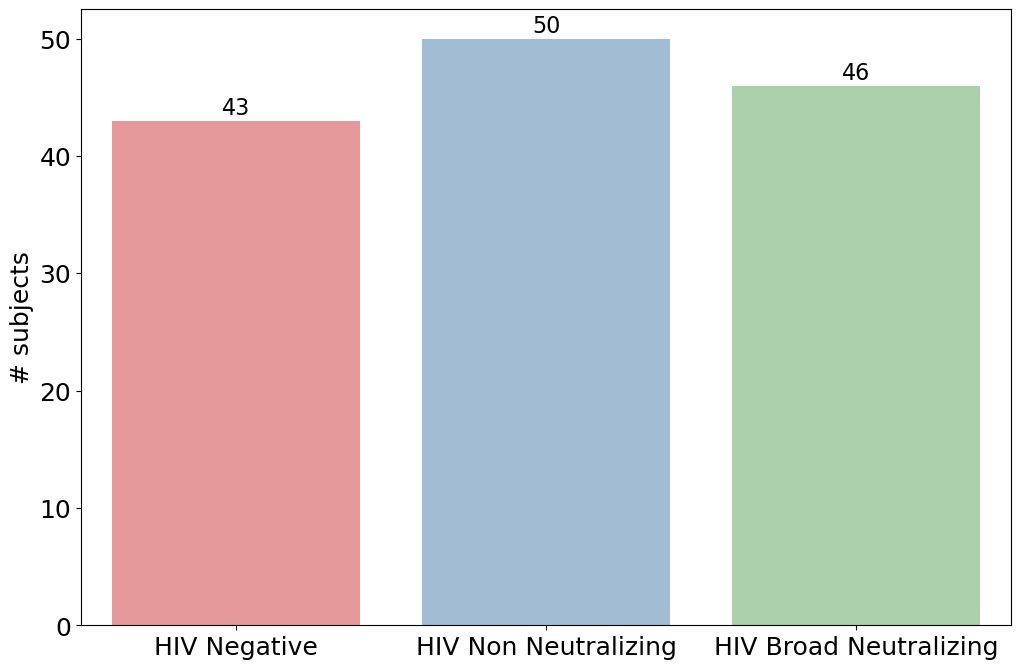

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_unique_patient is your DataFrame

# Define the custom order of processing_types
processing_types = ['HIV Negative', 'HIV Non Neutralizing', 'HIV Broad Neutralizing']

# Create a countplot with a specified order for the bars
plt.figure(figsize=(12, 8))
custom_palette = sns.color_palette("Set1", n_colors=3)
ax = sns.countplot(data=df_unique_patient, x='disease', palette=custom_palette, alpha=0.5, order=processing_types)

# Adding patient counts as labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=16)

plt.ylabel('# subjects', fontsize=18)
plt.xlabel('')
ax.tick_params(axis='both', labelsize=18)
ax.set_xticklabels(processing_types, fontsize=18)

plt.savefig(out_path + '#_subjects.png', dpi=300)
plt.savefig(out_path + '#_subjects.svg', dpi=300)
plt.show()


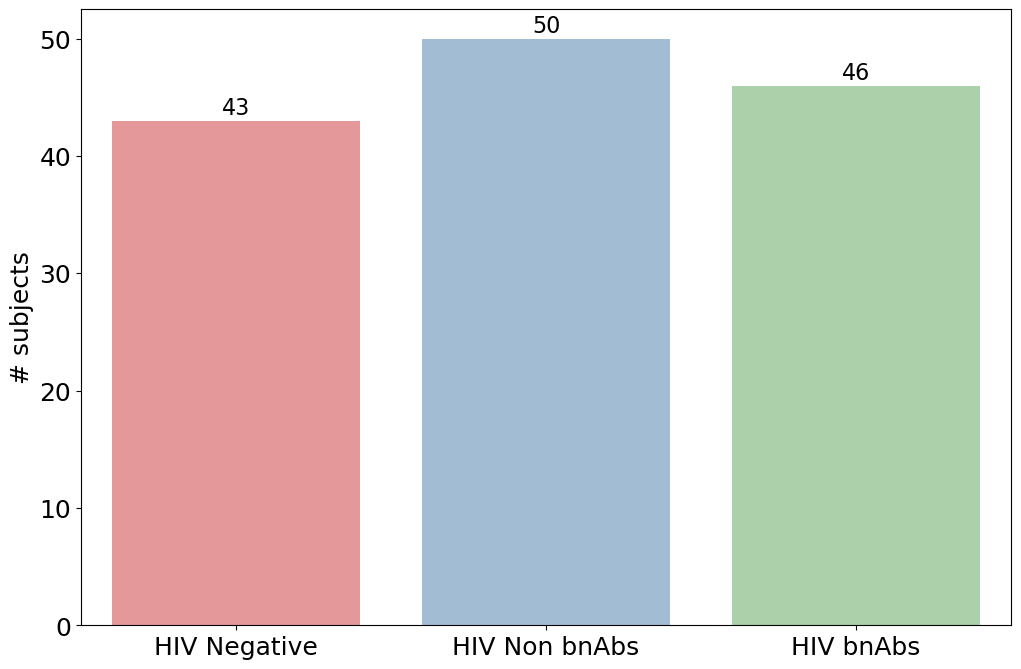

In [25]:
processing_types = ['HIV Negative', 'HIV Non Neutralizing', 'HIV Broad Neutralizing']

# Create a countplot with a specified order for the bars
plt.figure(figsize=(12, 8))
custom_palette = sns.color_palette("Set1", n_colors=3)
ax = sns.countplot(data=df_unique_patient, x='disease', palette=custom_palette, alpha=0.5, order=processing_types)


# Adding patient counts as labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()+0.5),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',fontsize=16)

plt.ylabel('# subjects', fontsize=18)
processing_types = ['HIV Negative','HIV Non bnAbs','HIV bnAbs' ]
plt.xlabel('')
ax.tick_params(axis='both', labelsize=18)
ax.set_xticklabels(processing_types, fontsize=18)
plt.savefig(out_path + '#_subjects.png',dpi=300)
plt.savefig(out_path +'#_subjects.svg',dpi=300)

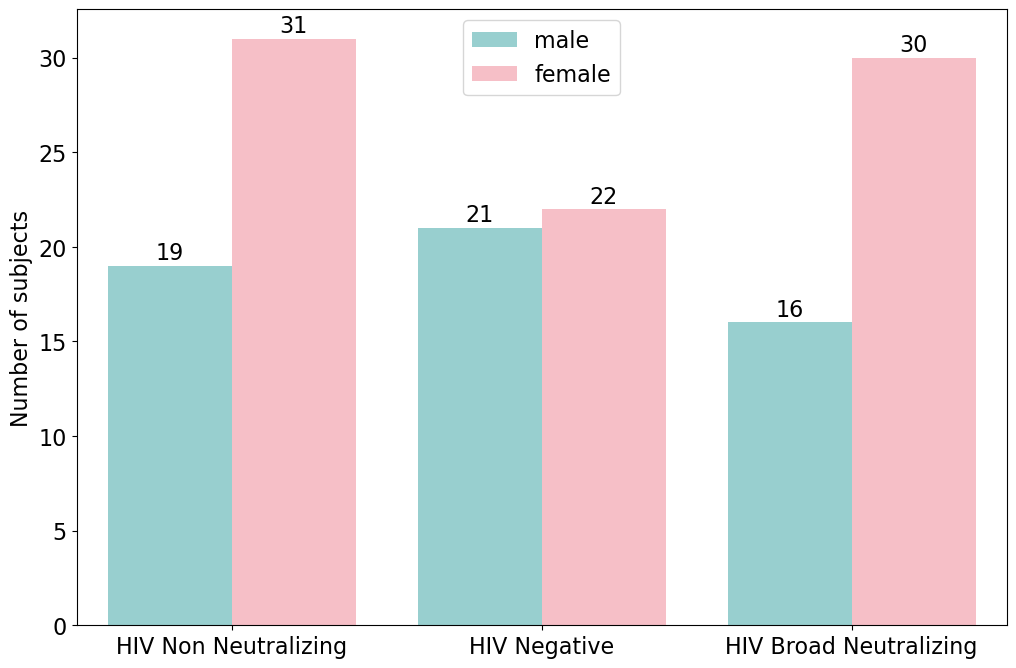

In [7]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_unique_patient, x='disease', hue='sex', palette={'male': '#8FD8D8', 'female': 'lightpink'})

# Adding patient counts for each gender as integer labels on bars
for p in ax.patches:
    if p.get_height() > 0:  # Ensure there are counts to display
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()+0.3),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=16)

plt.ylabel('Number of subjects',fontsize=16)
plt.xlabel('')
plt.legend(fontsize=16)
ax.tick_params(axis='both', labelsize=16)
plt.savefig(out_path + '#_subjects_sex.png',dpi=300)
plt.savefig(out_path +'#_subjects_sex.svg',dpi=300)


/tmp/ipykernel_2524750/4123245473.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_unique_patient, x='disease',  y='Age', estimator=np.mean, ci=None, hue='sex', palette={'male': '#8FD8D8', 'female': 'lightpink'})


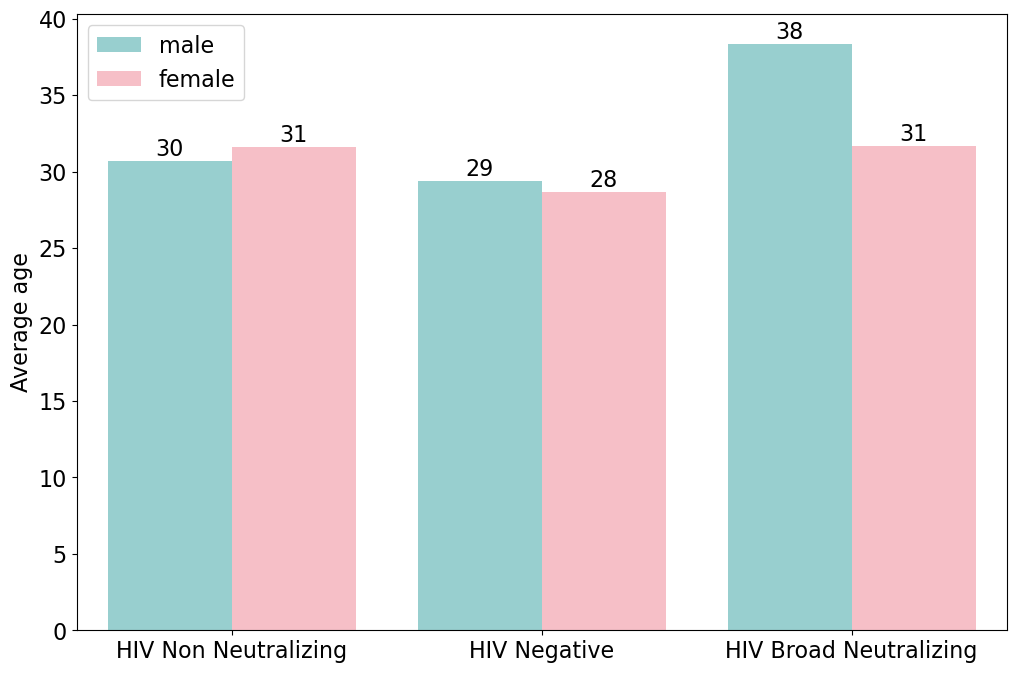

In [8]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_unique_patient, x='disease',  y='Age', estimator=np.mean, ci=None, hue='sex', palette={'male': '#8FD8D8', 'female': 'lightpink'})

# Adding patient counts for each gender as integer labels on bars
for p in ax.patches:
    if p.get_height() > 0:  # Ensure there are counts to display
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()+0.3),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=16)

plt.ylabel('Average age',fontsize=16)
plt.xlabel('')
plt.legend(fontsize=16)
ax.tick_params(axis='both', labelsize=16)
plt.savefig(out_path + 'avg_age_subjects.png',dpi=300)
plt.savefig(out_path +'avg_age_subjects.svg',dpi=300)


## ACCESION LIST PER DISEASE
Prepare the list of accesion numbers to retrieve the dna sequences for each subjects/experiment -->   
1_download_fasta_per_disease.sh based on download_fastq_fasta_from_accession_list.sh

In [9]:
## non neutralizing
!mkdir HIV_NON
df['Run'][df['disease']== 'HIV Non Neutralizing'].to_csv('./HIV_NON/HIV_NON_acc_list.txt', index=False, header=None)

mkdir: cannot create directory ‘HIV_NON’: File exists


In [10]:
# hiv negative
!mkdir HIV_NEG
df['Run'][df['disease']== 'HIV Negative'].to_csv('./HIV_NEG/HIV_NEG_acc_list.txt', index=False, header=None)

mkdir: cannot create directory ‘HIV_NEG’: File exists


In [11]:
## non neutralizing
!mkdir HIV_BNABS
df['Run'][df['disease']== 'HIV Broad Neutralizing'].to_csv('./HIV_BNABS/HIV_BNABS_acc_list.txt', index=False, header=None)

mkdir: cannot create directory ‘HIV_BNABS’: File exists
